<a href="https://colab.research.google.com/github/salexashenko/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

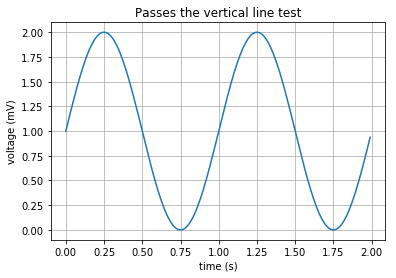

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='Passes the vertical line test')
ax.grid()

fig.savefig("test.png")
plt.show()

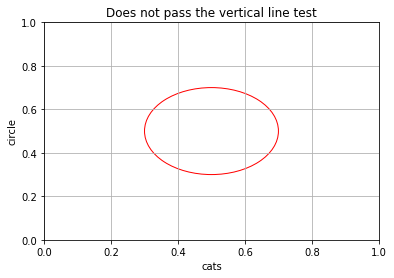

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np



fig, ax = plt.subplots()
circle1 = plt.Circle((0.5, 0.5), .2, color='r',fill=False)
ax.add_artist(circle1)

ax.set(xlabel='cats', ylabel='circle',
       title='Does not pass the vertical line test')
ax.grid()

fig.savefig("test.png")
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because they are not linear

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Just 2. The others have multiple y values for a single x value

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

3,3
4,3

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

𝑥↦(𝑥*,5x,sqrt(x))*

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [13]:
p10=[1,-1]
p01=[3,2]
transformationmatrix_p=[[1,3],[-1,2]]
q100=[4,-1,5]
q010=[1,2,1]
q001=[2,3,-2]
transformationmatrix_q=[[4,1,2],[-1,2,3],[5,1,-2]]


[4 1]
[7 4 4]


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [14]:
p11 = [4,1] #answer to 1 1 input
pinput=np.array([1,1])
qinput=np.array([1,1,1])
q11=[7,4,4] #answer to 1 1 1 input
print(np.dot(transformationmatrix_p,pinput))
print(np.dot(transformationmatrix_q,qinput))

[4 1]
[7 4 4]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

eigenvectors are vectors that, given a transformation defined by a given matrix, do not change direction when that transformation is applied. eigenvalues are values by which eigenvectors are scaled during that transformation

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

In [0]:
#Hard to visualize, high computational workload

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

In [0]:
#N = 5P AS A MINIMUM. More is better

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 


 Eigenvectors: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

 Eigenvalues: 
 [2.91081808 0.92122093 0.14735328 0.02060771]


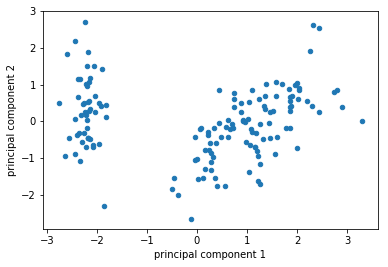

In [38]:
import pandas as pd
from numpy import array
from numpy import mean
from numpy import std
from numpy import cov
from numpy.linalg import eig
df=pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')

df=df.drop(['species'], axis=1)
df.head()
# define a matrix (we'll pretend that we've already separated our X and Y matrices)

# calculate the mean of each column
means=df.mean(axis=0)
#means
# center columns by subtracting column means
df['sepal_length']=df['sepal_length']-5.843333
df['sepal_width']=df['sepal_width']-3.054000
df['petal_length']=df['petal_length']-3.758667
df['petal_width']=df['petal_width']-1.198667
df.head()
# calculate the standard deviation of each column
stds=df.std(axis=0)
stds
# complete the standardization by dividing by std_dev
df['sepal_length']=df['sepal_length']/stds[0]
df['sepal_width']=df['sepal_width']/stds[1]
df['petal_length']=df['petal_length']/stds[2]
df['petal_width']=df['petal_width']/stds[3]
# calculate covariance matrix of centered matrix
covariance_matrix=df.cov()


# eigendecomposition of covariance matrix
values, vectors = eig(covariance_matrix)
print("\n Eigenvectors: \n", vectors)
print("\n Eigenvalues: \n", values)
#I could apply the vectors but it seems like a lot of work given that we can use a standard function
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.plot.scatter('principal component 1', 'principal component 2')


# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)